<a href="https://colab.research.google.com/github/jonathanwise123/Sales_Performance_Analysis/blob/main/Market_Segmentation_Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/ecommerce_nigeria_dataset_binary_success .csv")

In [3]:
df.head(100)

,CustomerID,Location,Date,Transaction Hour,Gender,Age,Annual Income (NGN),Spending Score,Payment Method,Device Used,Product Category,Transaction Amount (NGN),Is Payment Successful
0,1,Cross River,4/9/2024,21,Male,27,1388044,44,Debit Card,Mobile,Home & Kitchen,42619,1
1,2,Anambra,11/4/2023,7,Female,54,2541086,92,Debit Card,Tablet,Groceries,37099,0
2,3,Cross River,4/21/2024,15,Male,60,4154719,11,Debit Card,Desktop,Electronics,18986,0
3,4,Oyo,7/21/2024,0,Female,43,5439810,65,Debit Card,Desktop,Electronics,9203,1
4,5,Ogun,4/14/2024,19,Male,22,3859216,83,Online payment,Desktop,Home & Kitchen,41961,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Kaduna,7/1/2024,5,Female,57,4705773,99,Bank Transfer,Desktop,Groceries,31593,0
96,97,Cross River,2/17/2024,3,Female,47,1765514,80,Credit Card,Desktop,Groceries,33686,0
97,98,Anambra,5/10/2024,21,Female,41,1019034,17,Credit Card,Mobile,Electronics,21220,0
98,99,Enugu,11/4/2023,0,Male,23,4279261,77,Online payment,Tablet,Groceries,33595,0


In [4]:
df.tail()

,CustomerID,Location,Date,Transaction Hour,Gender,Age,Annual Income (NGN),Spending Score,Payment Method,Device Used,Product Category,Transaction Amount (NGN),Is Payment Successful
95,96,Kaduna,7/1/2024,5,Female,57,4705773,99,Bank Transfer,Desktop,Groceries,31593,0
96,97,Cross River,2/17/2024,3,Female,47,1765514,80,Credit Card,Desktop,Groceries,33686,0
97,98,Anambra,5/10/2024,21,Female,41,1019034,17,Credit Card,Mobile,Electronics,21220,0
98,99,Enugu,11/4/2023,0,Male,23,4279261,77,Online payment,Tablet,Groceries,33595,0
99,100,Abuja,5/17/2024,4,Male,45,1368236,49,Online payment,Desktop,Fashion,2518,1


In [5]:
df.isnull().sum()

CustomerID                  0
Location                    0
Date                        0
Transaction Hour            0
Gender                      0
Age                         0
Annual Income (NGN)         0
Spending Score              0
Payment Method              0
Device Used                 0
Product Category            0
Transaction Amount (NGN)    0
Is Payment Successful       0
dtype: int64

In [6]:
df.describe()

,CustomerID,Transaction Hour,Age,Annual Income (NGN),Spending Score,Transaction Amount (NGN),Is Payment Successful
count,100.000000,100.000000,100.00000,1.000000e+02,100.000000,100.000000,100.00000
mean,50.500000,11.040000,38.61000,3.856410e+06,54.310000,26277.990000,0.43000
std,29.011492,7.143437,12.37617,1.831768e+06,28.758379,13506.838016,0.49757
min,1.000000,0.000000,18.00000,8.154720e+05,3.000000,2518.000000,0.00000
25%,25.750000,4.000000,27.00000,2.114703e+06,31.250000,14703.750000,0.00000
50%,50.500000,11.000000,39.50000,4.199254e+06,50.500000,27371.500000,0.00000
75%,75.250000,18.000000,47.50000,5.445154e+06,83.000000,38571.000000,1.00000
max,100.000000,23.000000,60.00000,6.983119e+06,100.000000,49116.000000,1.00000


<Axes: xlabel='Spending Score', ylabel='Density'>

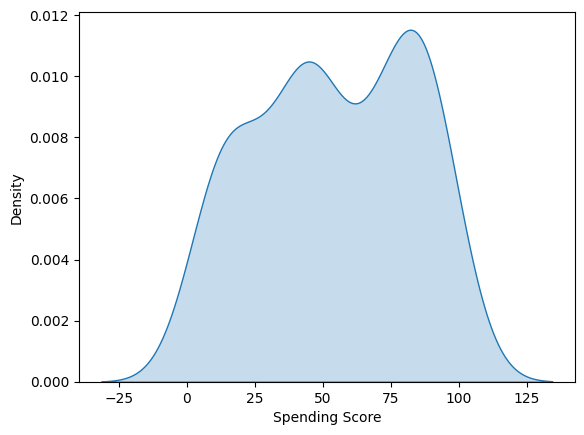

In [7]:
sns.kdeplot(df['Spending Score'], shade = True)

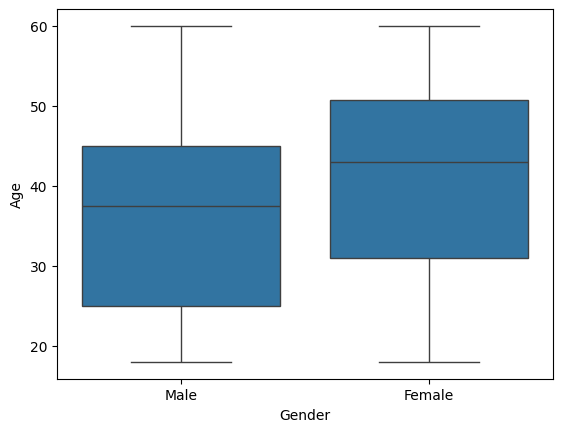

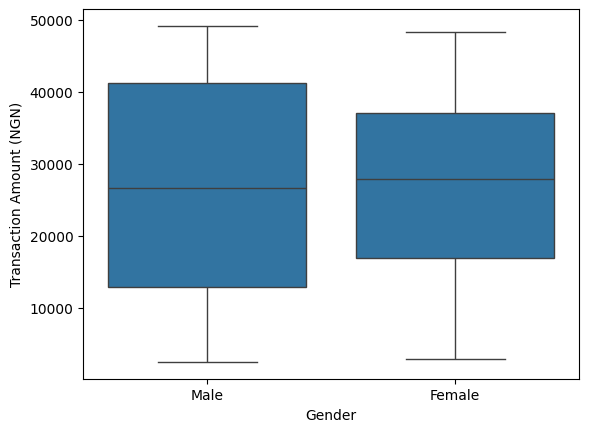

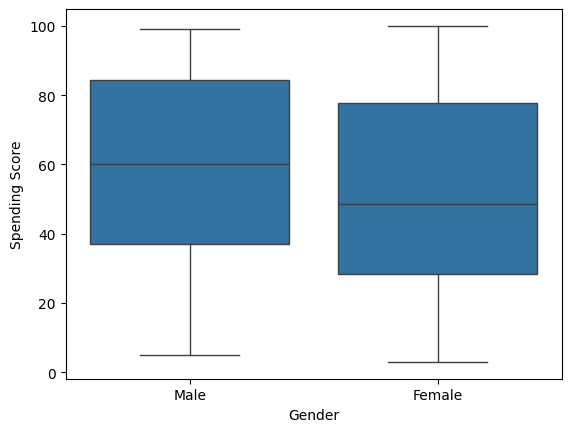

In [8]:
columns = ['Age', 'Transaction Amount (NGN)','Spending Score']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [9]:
df['Gender'].value_counts()

Gender
Female    54
Male      46
Name: count, dtype: int64

In [10]:
#Bivariate Analysis

<Axes: xlabel='Transaction Amount (NGN)', ylabel='Spending Score'>

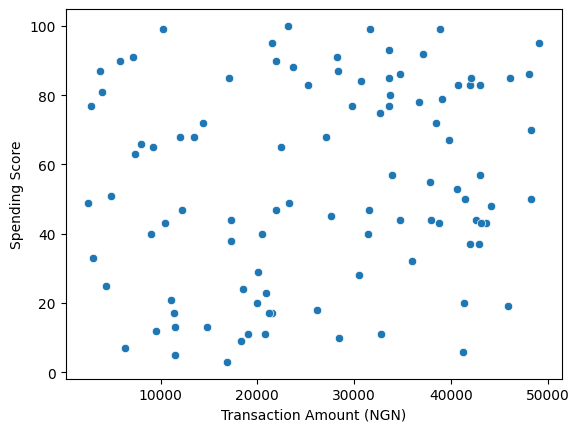

In [11]:
sns.scatterplot(data=df, x='Transaction Amount (NGN)',y='Spending Score' )

In [12]:
df.groupby(['Gender'])[['Age', 'Transaction Amount (NGN)',
       'Spending Score']].mean()

,Age,Transaction Amount (NGN),Spending Score
Gender,,,
Female,40.814815,25894.370370,51.740741
Male,36.021739,26728.326087,57.326087


In [13]:
selected_columns = ['Age', 'Transaction Amount (NGN)','Spending Score']

# Create a new DataFrame with only the selected columns
selected_data = df[selected_columns]

# Compute the correlation
correlation= selected_data.corr()

# Display the correlation matrix
print(correlation)

                               Age  Transaction Amount (NGN)  Spending Score
Age                       1.000000                  0.049385       -0.063228
Transaction Amount (NGN)  0.049385                  1.000000        0.181395
Spending Score           -0.063228                  0.181395        1.000000


<Axes: >

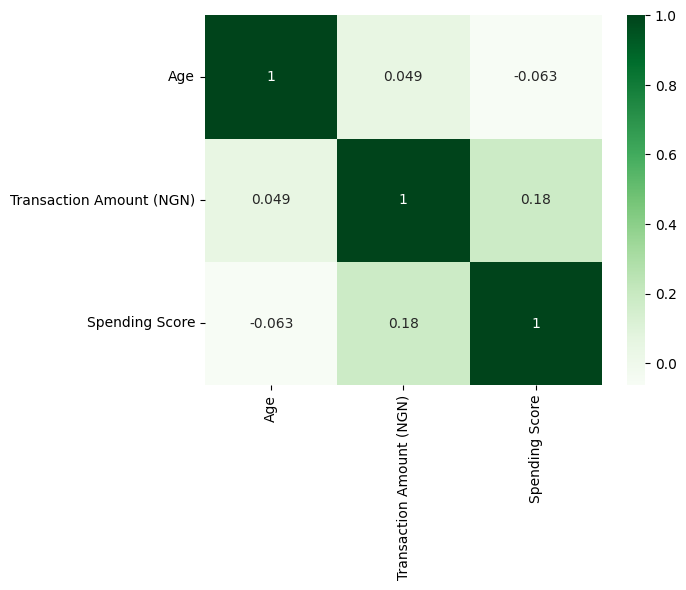

In [14]:
sns.heatmap(correlation,annot= True, cmap='Greens')

In [15]:
# Clustering Analysis using KMeans Algorithms

In [16]:
Cluster1 = KMeans(n_clusters=4)

In [17]:
Cluster1.fit(df[['Transaction Amount (NGN)']])

KMeans(n_clusters=4)

In [18]:
Cluster1.labels_

array([0, 0, 1, 2, 0, 1, 0, 3, 2, 3, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0,
       2, 2, 2, 2, 0, 0, 1, 0, 1, 0, 3, 0, 0, 2, 3, 0, 3, 1, 0, 1, 3, 1,
       0, 3, 1, 3, 2, 0, 2, 2, 3, 3, 3, 3, 1, 1, 0, 2, 1, 0, 1, 0, 1, 3,
       2, 1, 3, 0, 2, 1, 1, 3, 2, 1, 3, 1, 2, 2, 2, 1, 3, 0, 3, 1, 2, 1,
       0, 0, 1, 2, 2, 3, 3, 3, 3, 1, 3, 2], dtype=int32)

In [19]:
df['Transaction Amount (NGN)_cluster'] = Cluster1.labels_
df.head()

,CustomerID,Location,Date,Transaction Hour,Gender,Age,Annual Income (NGN),Spending Score,Payment Method,Device Used,Product Category,Transaction Amount (NGN),Is Payment Successful,Transaction Amount (NGN)_cluster
0,1,Cross River,4/9/2024,21,Male,27,1388044,44,Debit Card,Mobile,Home & Kitchen,42619,1,0
1,2,Anambra,11/4/2023,7,Female,54,2541086,92,Debit Card,Tablet,Groceries,37099,0,0
2,3,Cross River,4/21/2024,15,Male,60,4154719,11,Debit Card,Desktop,Electronics,18986,0,1
3,4,Oyo,7/21/2024,0,Female,43,5439810,65,Debit Card,Desktop,Electronics,9203,1,2
4,5,Ogun,4/14/2024,19,Male,22,3859216,83,Online payment,Desktop,Home & Kitchen,41961,1,0


In [20]:
# Count how many variables are in each clusters

df['Transaction Amount (NGN)_cluster'].value_counts()

Transaction Amount (NGN)_cluster
0    29
1    24
2    24
3    23
Name: count, dtype: int64

In [21]:
Cluster1.inertia_

961482757.0078087

In [22]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Transaction Amount (NGN)']])
    intertia_scores.append(kmeans.inertia_)

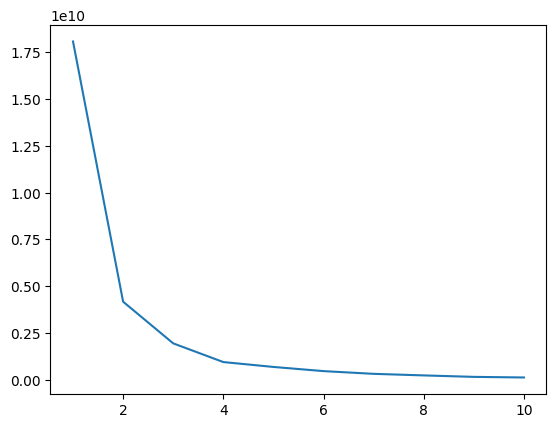

In [ ]:
plt.plot(range(1,11),intertia_scores)

In [23]:
# Look into the mean values group by Transactio Amount_Cluster

df.groupby(['Transaction Amount (NGN)_cluster'])[['Age', 'Transaction Amount (NGN)',
       'Spending Score']].mean()

,Age,Transaction Amount (NGN),Spending Score
Transaction Amount (NGN)_cluster,,,
0,38.862069,42327.241379,59.586207
1,39.333333,20059.208333,44.708333
2,35.833333,7972.500000,50.750000
3,40.434783,31632.521739,61.391304


In [24]:
df.columns

Index(['CustomerID', 'Location', 'Date', 'Transaction Hour', 'Gender', 'Age',
       'Annual Income (NGN)', 'Spending Score', 'Payment Method',
       'Device Used', 'Product Category', 'Transaction Amount (NGN)',
       'Is Payment Successful', 'Transaction Amount (NGN)_cluster'],
      dtype='object')

In [25]:
# Bivariate clustering Analysis using Kmeans

cluster2 = KMeans(n_clusters=3)
cluster2.fit(df[['Transaction Amount (NGN)','Spending Score']])
df['Spending score and Transaction Amount_clusters'] =cluster2.labels_
df.head()

,CustomerID,Location,Date,Transaction Hour,Gender,Age,Annual Income (NGN),Spending Score,Payment Method,Device Used,Product Category,Transaction Amount (NGN),Is Payment Successful,Transaction Amount (NGN)_cluster,Spending score and Transaction Amount_clusters
0,1,Cross River,4/9/2024,21,Male,27,1388044,44,Debit Card,Mobile,Home & Kitchen,42619,1,0,0
1,2,Anambra,11/4/2023,7,Female,54,2541086,92,Debit Card,Tablet,Groceries,37099,0,0,0
2,3,Cross River,4/21/2024,15,Male,60,4154719,11,Debit Card,Desktop,Electronics,18986,0,1,2
3,4,Oyo,7/21/2024,0,Female,43,5439810,65,Debit Card,Desktop,Electronics,9203,1,2,1
4,5,Ogun,4/14/2024,19,Male,22,3859216,83,Online payment,Desktop,Home & Kitchen,41961,1,0,0


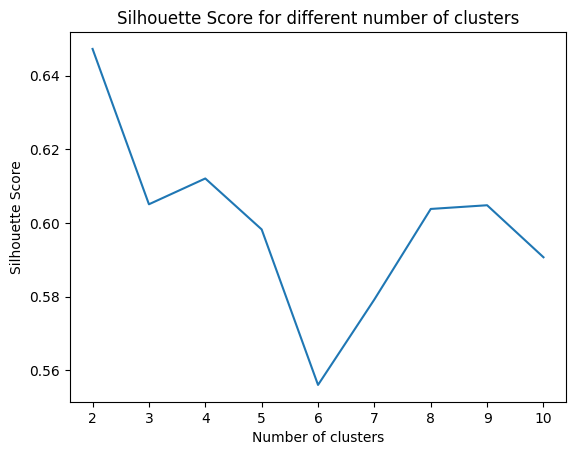

In [26]:
silhouette_scores = []

# Calculate silhouette scores for a range of cluster numbers
for i in range(2, 11):  # Starting from 2 because silhouette score is not defined for 1 cluster
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Transaction Amount (NGN)', 'Spending Score']])
    score = silhouette_score(df[['Transaction Amount (NGN)', 'Spending Score']], kmeans.labels_)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters')
plt.show()



In [27]:
centers = pd.DataFrame(cluster2.cluster_centers_)
centers.columns=['x','y']
centers

,x,y
0,39492.627907,61.209302
1,8481.730769,50.115385
2,22873.903226,48.258065


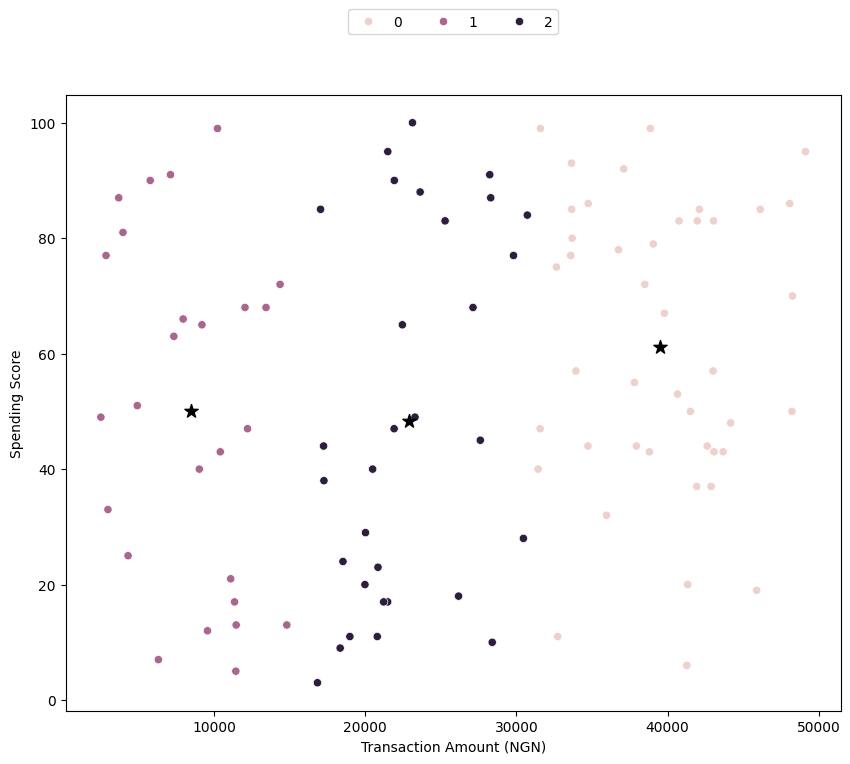

In [28]:
plt.figure(figsize=(10, 8))
scatterplot = sns.scatterplot(data=df, x='Transaction Amount (NGN)', y='Spending Score', hue='Spending score and Transaction Amount_clusters', palette=None)
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
# Position the hue legend at the top
scatterplot.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)

In [29]:
pd.crosstab(df['Spending score and Transaction Amount_clusters'],df['Gender'],normalize='index')

Gender,Female,Male
Spending score and Transaction Amount_clusters,,
0,0.534884,0.465116
1,0.500000,0.500000
2,0.580645,0.419355


In [30]:
max_age = df['Age'].max()
print("The maximum age in the DataFrame is:", max_age)

The maximum age in the DataFrame is: 60


In [31]:
pd.crosstab(df['Spending score and Transaction Amount_clusters'],df['Age'],normalize='index')

Age,18,19,20,21,22,23,25,26,27,28,...,50,51,52,53,54,55,56,57,58,60
Spending score and Transaction Amount_clusters,,,,,,,,,,,,,,,,,,,,,
0,0.046512,0.023256,0.023256,0.023256,0.023256,0.069767,0.023256,0.023256,0.023256,0.023256,...,0.023256,0.023256,0.023256,0.000000,0.069767,0.023256,0.023256,0.023256,0.023256,0.023256
1,0.000000,0.076923,0.000000,0.038462,0.000000,0.038462,0.000000,0.000000,0.038462,0.076923,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,0.038462
2,0.000000,0.000000,0.032258,0.032258,0.064516,0.000000,0.096774,0.032258,0.032258,0.000000,...,0.032258,0.032258,0.000000,0.032258,0.032258,0.000000,0.064516,0.000000,0.032258,0.064516


In [32]:
df.groupby(['Spending score and Transaction Amount_clusters'])[['Age', 'Transaction Amount (NGN)',
       'Spending Score','Transaction Hour']].mean()

,Age,Transaction Amount (NGN),Spending Score,Transaction Hour
Spending score and Transaction Amount_clusters,,,,
0,38.395349,39492.627907,61.209302,11.767442
1,36.807692,8481.730769,50.115385,10.538462
2,40.419355,22873.903226,48.258065,10.451613


In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
df.columns

Index(['CustomerID', 'Location', 'Date', 'Transaction Hour', 'Gender', 'Age',
       'Annual Income (NGN)', 'Spending Score', 'Payment Method',
       'Device Used', 'Product Category', 'Transaction Amount (NGN)',
       'Is Payment Successful', 'Transaction Amount (NGN)_cluster',
       'Spending score and Transaction Amount_clusters'],
      dtype='object')

In [35]:
df.head()

,CustomerID,Location,Date,Transaction Hour,Gender,Age,Annual Income (NGN),Spending Score,Payment Method,Device Used,Product Category,Transaction Amount (NGN),Is Payment Successful,Transaction Amount (NGN)_cluster,Spending score and Transaction Amount_clusters
0,1,Cross River,4/9/2024,21,Male,27,1388044,44,Debit Card,Mobile,Home & Kitchen,42619,1,0,0
1,2,Anambra,11/4/2023,7,Female,54,2541086,92,Debit Card,Tablet,Groceries,37099,0,0,0
2,3,Cross River,4/21/2024,15,Male,60,4154719,11,Debit Card,Desktop,Electronics,18986,0,1,2
3,4,Oyo,7/21/2024,0,Female,43,5439810,65,Debit Card,Desktop,Electronics,9203,1,2,1
4,5,Ogun,4/14/2024,19,Male,22,3859216,83,Online payment,Desktop,Home & Kitchen,41961,1,0,0


In [36]:
# getting the count of payment that are succesful

df['Is Payment Successful'].value_counts()

Is Payment Successful
0    57
1    43
Name: count, dtype: int64

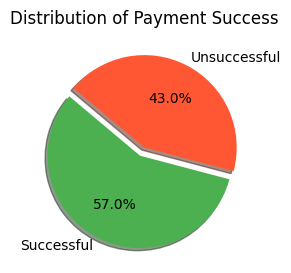

In [37]:
payment_success_distribution = df['Is Payment Successful'].value_counts()

# Plot the pie chart
labels = ['Successful', 'Unsuccessful']
sizes = payment_success_distribution.values
colors = ['#4CAF50', '#FF5733']
explode = (0.1, 0)  # Explode the first slice (Successful)

plt.figure(figsize=(3, 3))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Payment Success')
plt.show()

In [42]:
# Features and target
X = df.drop(['CustomerID', 'Date', 'Is Payment Successful'], axis=1)
y = df['Is Payment Successful']

In [43]:
y.head()

0    1
1    0
2    0
3    1
4    1
Name: Is Payment Successful, dtype: int64

In [44]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
import numpy as np


In [46]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

43
26
17


In [47]:
cols = list(X.columns.values)

In [48]:
df.columns

Index(['CustomerID', 'Location', 'Date', 'Transaction Hour', 'Gender', 'Age',
       'Annual Income (NGN)', 'Spending Score', 'Payment Method',
       'Device Used', 'Product Category', 'Transaction Amount (NGN)',
       'Is Payment Successful', 'Transaction Amount (NGN)_cluster',
       'Spending score and Transaction Amount_clusters'],
      dtype='object')

In [49]:
# Encode categorical features using one-hot encoding
categorical_features = ['Location', 'Gender', 'Payment Method', 'Device Used', 'Product Category']
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Split the data into features and target variable
X = df_encoded.drop(['CustomerID', 'Date', 'Is Payment Successful'], axis=1)
y = df_encoded['Is Payment Successful']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [50]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Define and train the model
model = RandomForestClassifier(class_weight='balanced', random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Predict and evaluate
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'ROC-AUC: {roc_auc_score(y_test, y_pred):.2f}')

# Evaluate with cross-validation (optional but recommended)
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_model, X_res, y_res, cv=5, scoring='roc_auc')
print(f'Cross-validated ROC-AUC: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')

[[10  4]
 [ 8 13]]
              precision    recall  f1-score   support

           0       0.56      0.71      0.63        14
           1       0.76      0.62      0.68        21

    accuracy                           0.66        35
   macro avg       0.66      0.67      0.65        35
weighted avg       0.68      0.66      0.66        35

ROC-AUC: 0.67
Cross-validated ROC-AUC: 0.70 ± 0.08


In [51]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [52]:
# Make predictions
y_pred = clf.predict(X_test)

In [53]:
# Evaluate the model
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2%}')

    0   1
0  10   4
1   9  12
              precision    recall  f1-score   support

           0       0.53      0.71      0.61        14
           1       0.75      0.57      0.65        21

    accuracy                           0.63        35
   macro avg       0.64      0.64      0.63        35
weighted avg       0.66      0.63      0.63        35

Accuracy: 62.86%


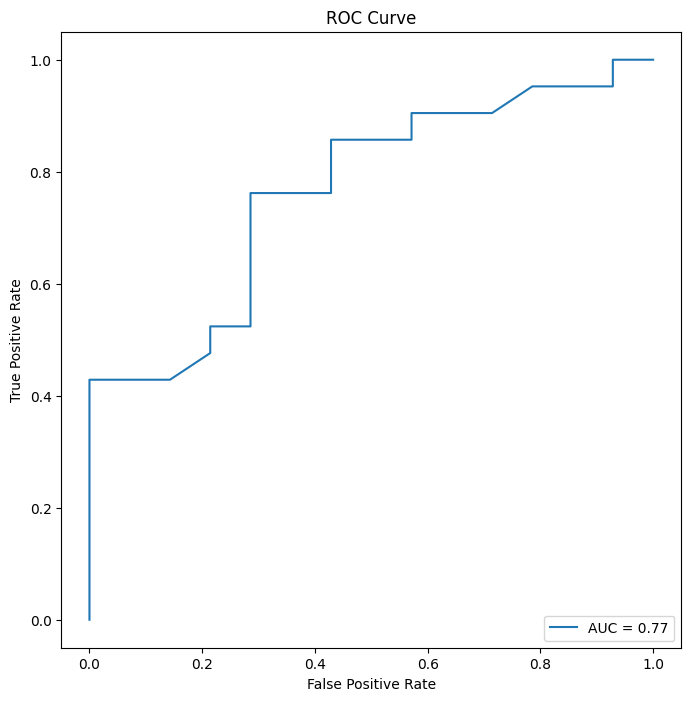

In [54]:
# Plot the ROC Curve
y_pred_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [55]:
# Plot the distribution of payment success
payment_success_distribution = df['Is Payment Successful'].value_counts()
labels = ['Not fraudulent', 'Fraudulent']
sizes = payment_success_distribution.values
colors = ['#4CAF50', '#FF5733']  # Green for success, Red for failure
explode = (0.1, 0)  # Explode the first slice (Successful)

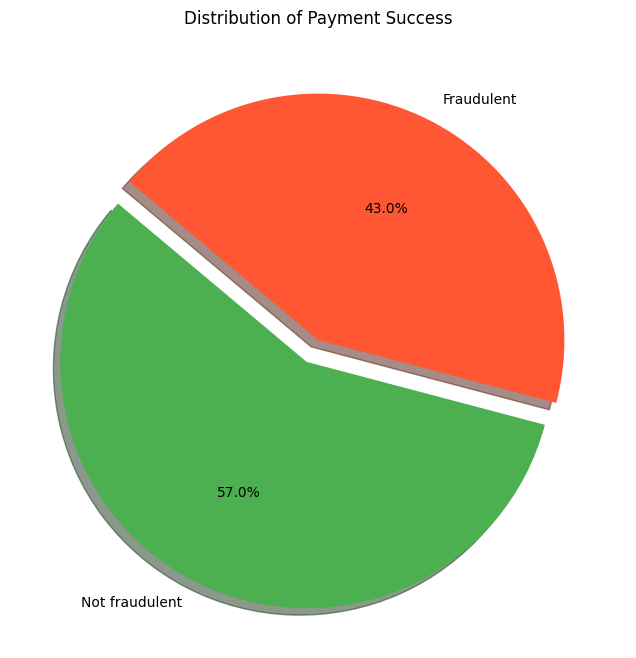

In [56]:
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Payment Success')
plt.show()